In [1]:
import napari_workflows
from napari_workflows._io_yaml_v1 import load_workflow
import napari
import napari_pyclesperanto_assistant
from napari_pyclesperanto_assistant._workflow_io_utility import *
from skimage.io import imread

filename = 'test_workflow_long.yaml'
workflow = load_workflow(filename)
print(workflow)

Workflow:
Result of Black top-hat (scipy, nsbatwm) <- (<function black_tophat at 0x000001CA911324C0>, 'Result of Percentile (scipy, nsbatwm)', 16.0)
Result of Gaussian (scikit-image, nsbatwm) <- (<function gaussian_blur at 0x000001CA910CCEE0>, 'blobs', 4.0)
Result of Gaussian (scikit-image, nsbatwm) [1] <- (<function gaussian_blur at 0x000001CA910CCEE0>, 'blobs_messed_up', 8.0)
Result of Minimum (scipy, nsbatwm) <- (<function minimum_filter at 0x000001CA911325E0>, 'Result of Gaussian (scikit-image, nsbatwm)', 3.0)
Result of Multiply images (numpy, nsbatwm) <- (<function multiply_images at 0x000001CA91135670>, 'Result of Black top-hat (scipy, nsbatwm)', 'Result of Minimum (scipy, nsbatwm)')
Result of Percentile (scipy, nsbatwm) <- (<function percentile_filter at 0x000001CA91132280>, 'Result of Gaussian (scikit-image, nsbatwm) [1]', 7.0, 9.0)
Result of Remove labeled objects at the image border (scikit-image, nsbatwm) <- (<function remove_labels_on_edges at 0x000001CA91132CA0>, 'Result o

In [2]:
#desktop = 'C:/Users/ryans/Desktop/'
desktop = 'C:/Users/ryans/Onedrive/Desktop/'

image1 = imread(desktop + 'blobs.tif')
image2 = imread(desktop + 'blobs_messed_up.tiff')

viewer = napari.Viewer()
viewer.add_image(image1)
viewer.add_image(image2)

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'image2' at 0x1ca911def10>

In [3]:
root_functions = wf_steps_with_root_as_input(workflow)

wf_step_name = root_functions[0]

func = workflow._tasks[wf_step_name][0]
signat = signature_w_kwargs_from_function(workflow=workflow,
                                          wf_step_name=wf_step_name)
func.__signature__ = signat

widget = make_flexible_gui(func, 
                           viewer, 
                           wf_step_name= wf_step_name)

In [4]:
def get_source_keywords_and_sources(workflow,wf_step):
    from inspect import signature
    func = workflow._tasks[wf_step][0]
    args = workflow._tasks[wf_step][1:]
    
    sources = workflow.sources_of(wf_step)
    keyword_list = list(signature(func).parameters.keys())
    image_keywords = [(key,value) for key, value in zip(keyword_list,args) if value in sources]
    
    return image_keywords

key_source_list = get_source_keywords_and_sources(workflow,
                                                  wf_step=wf_step_name)
key_source_list

[('image', 'blobs')]

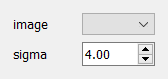

In [5]:
for key, source in key_source_list:
    widget[key].tooltip = f'Select {source} or equivalent'

widget

In [6]:
viewer.window.add_dock_widget(widget, name = wf_step_name[10:])# + '<b> - SELECT INPUT</b>')